#Implementación de Modelos

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.5 MB/s eta 0:00:00
   ━━━━

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score
from pycaret.classification import *
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



ModuleNotFoundError: No module named 'pycaret'

## Imporatción de Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown 1Tpwb4eCDli98UOD8hdv8JKgKAMGAtCL0 -O pumps_cleaned.csv

Downloading...
From: https://drive.google.com/uc?id=1Tpwb4eCDli98UOD8hdv8JKgKAMGAtCL0
To: /content/pumps_cleaned.csv
100% 8.41M/8.41M [00:00<00:00, 95.7MB/s]


In [ ]:
pumps_df=pd.read_csv("pumps_cleaned.csv")
pumps_df.shape

(59400, 17)

In [ ]:
pumps_df.head()

,id,longitude,latitude,region,extraction_type,management,payment_type,quality_group,quantity_group,source,waterpoint_type,status_group,population_imputed,altitud,construction_year_imputed,imputed_scheme__management,imputed_permit
0,69572,34.938093,-9.856322,Iringa,gravity,vwc,annually,good,enough,spring,communal standpipe,functional,109.0,1367.0,1999.0,VWC,False
1,8776,34.698766,-2.147466,Mara,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional,280.0,1440.0,2010.0,Other,True
2,34310,37.460664,-3.821329,Manyara,gravity,vwc,per bucket,good,enough,dam,communal standpipe multiple,functional,250.0,699.0,2009.0,VWC,True
3,67743,38.486161,-11.155298,Mtwara,submersible,vwc,never pay,good,dry,machine dbh,communal standpipe multiple,non functional,58.0,254.0,1986.0,VWC,True
4,19728,31.130847,-1.825359,Kagera,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional,0.0,1675.0,0.0,Other,True


## Comparación varios modelos

In [ ]:
clf = setup(data=pumps_df, target='status_group', session_id=123)
best_model = compare_models(sort='Accuracy')
# correrlo con precisión y no accuracy

,Description,Value
0,Session id,123
1,Target,status_group
2,Target type,Multiclass
3,Target mapping,"functional: 0, functional needs repair: 1, non functional: 2"
4,Original data shape,"(59400, 17)"
5,Transformed data shape,"(59400, 102)"
6,Transformed train set shape,"(41580, 102)"
7,Transformed test set shape,"(17820, 102)"
8,Numeric features,6
9,Categorical features,9


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7981,0.8994,0.7981,0.7910,0.7906,0.6213,0.6251,10.8730
xgboost,Extreme Gradient Boosting,0.7907,0.8928,0.7907,0.7874,0.7776,0.5995,0.6090,4.8100
et,Extra Trees Classifier,0.7864,0.8888,0.7864,0.7799,0.7814,0.6036,0.6054,13.6790
lightgbm,Light Gradient Boosting Machine,0.7822,0.8866,0.7822,0.7811,0.7667,0.5800,0.5928,6.3290
gbc,Gradient Boosting Classifier,0.7532,0.0000,0.7532,0.7594,0.7299,0.5145,0.5393,43.9000
dt,Decision Tree Classifier,0.7352,0.7666,0.7352,0.7369,0.7360,0.5222,0.5223,2.0780
ridge,Ridge Classifier,0.7292,0.0000,0.7292,0.6966,0.6950,0.4606,0.4879,1.2260
ada,Ada Boost Classifier,0.7271,0.0000,0.7271,0.7203,0.7009,0.4627,0.4842,4.7640
lda,Linear Discriminant Analysis,0.7269,0.0000,0.7269,0.7279,0.7092,0.4694,0.4909,1.9900
nb,Naive Bayes,0.6638,0.7427,0.6638,0.6513,0.6420,0.3460,0.3623,1.0630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Desition Tree

Para realizar un análisis preliminar de las variables que más impactan el estado de las bombas de agua en nuestra base de datos, hemos optado por utilizar un modelo de árbol de decisión. Este enfoque resulta útil en esta etapa exploratoria por varias razones: primero, los árboles de decisión ofrecen una interpretación intuitiva y visual, lo que facilita identificar rápidamente las relaciones entre las variables y el estado de las bombas. Además, permiten ordenar las variables en términos de importancia, ayudándonos a focalizar nuestro análisis en aquellas que tienen una mayor influencia.

### Primer modelo

In [ ]:
def preprocess_and_run_decision_tree(df, target_column):
    X = df.drop(columns=[target_column,'id']).copy()
    y = df[target_column]

    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)
    return model, accuracy, X_train, X_test, y_train, y_test

In [ ]:
model, accuracy , X_train, X_test, y_train, y_test= preprocess_and_run_decision_tree(pumps_df,'status_group')

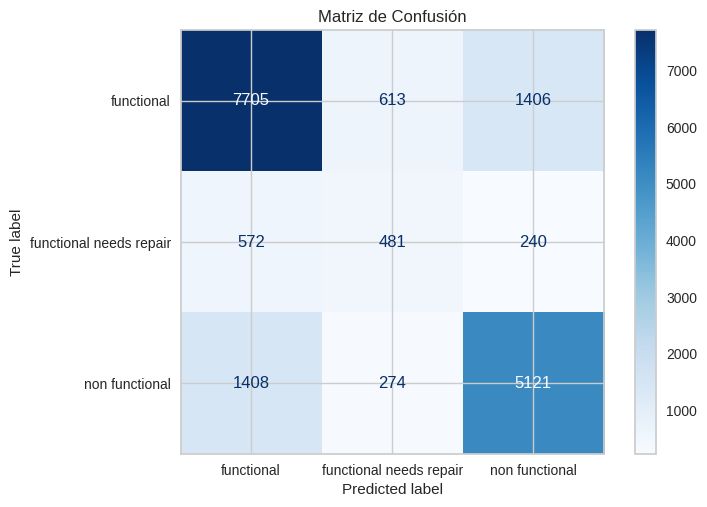

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión")
plt.show()

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprime las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7467452300785634
Precision: 0.7485353321339936
Recall: 0.7467452300785634
F1 Score: 0.7476156494608892


El modelo tiene un ligero sesgo hacia la clase mayoritaria ("functional"), lo cual es típico en conjuntos desbalanceados.

Las clases Funtional es solida, pero hay alta confusión en la clase del medio, probablemento por falta de info.

In [ ]:
def plot_decision_tree_entire(model, depth):
    plt.figure(figsize=(15, 10))
    plot_tree(
        model,
        filled=True,
        feature_names=model.feature_names_in_,
        class_names=[str(i) for i in model.classes_],
        fontsize=10,
        max_depth=depth
    )
    plt.title("Decision Tree")
    plt.show()

def plot_feature_importances(model, top_n=None):

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = model.feature_names_in_
    sorted_features = feature_names[indices]
    sorted_importances = importances[indices]


    if top_n is not None:
        sorted_features = sorted_features[:top_n]
        sorted_importances = sorted_importances[:top_n]

    plt.figure(figsize=(12, 8))
    plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
    plt.yticks(range(len(sorted_features)), sorted_features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Top Feature Importances Ordered by Impact on Target Variable")
    plt.gca().invert_yaxis()
    plt.show()

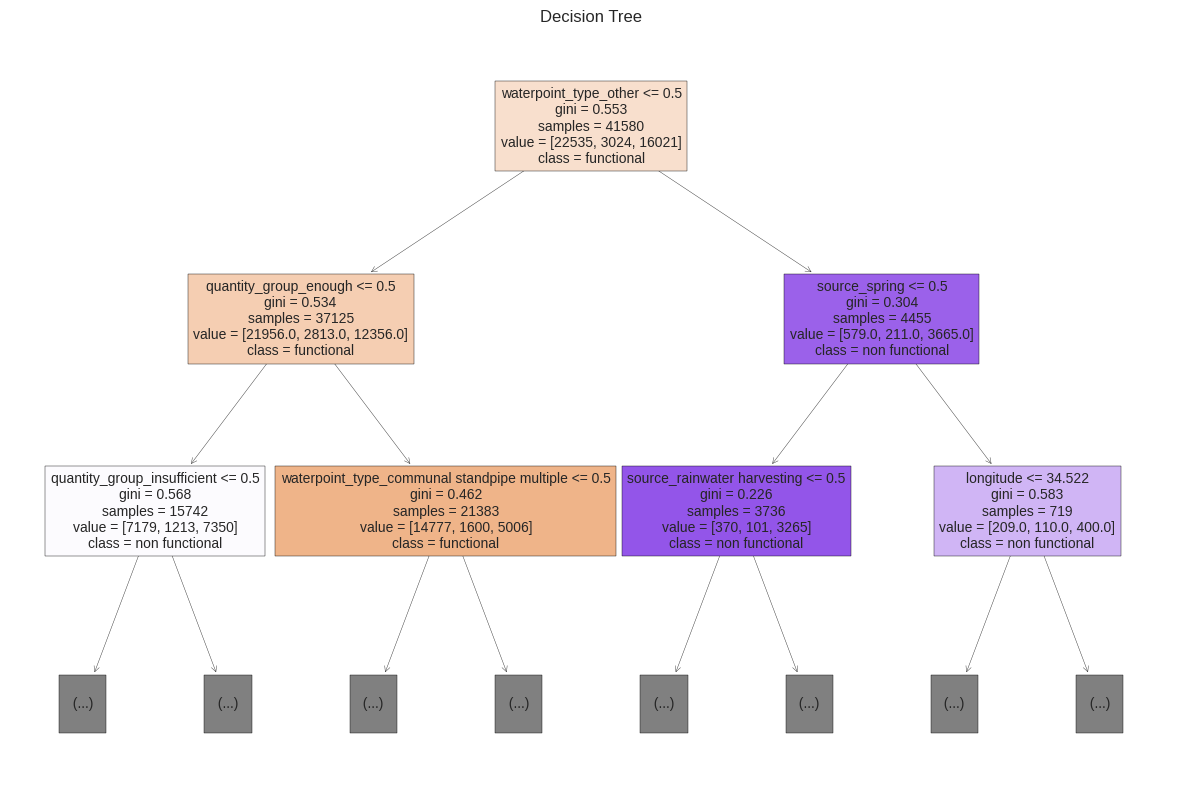

In [ ]:
plot_decision_tree_entire(model,2)

En la primera división, el atributo waterpoint_type_other separa los datos en función de un tipo de punto de agua menos común, sugiriendo que las bombas clasificadas como "other" tienen una menor probabilidad de ser funcionales. Esto podría indicar que la infraestructura o tecnología específica de estos puntos de agua es menos confiable o se encuentra en áreas menos desarrolladas.

En las ramas subsiguientes, características como quantity_group_enough y source_spring son determinantes clave. La cantidad suficiente de agua está directamente relacionada con la funcionalidad, lo que enfatiza la importancia de garantizar un suministro adecuado para que las bombas operen correctamente. Asimismo, las fuentes como los manantiales (source_spring) tienen menor funcionalidad, probablemente debido a factores naturales como contaminación o falta de mantenimiento.

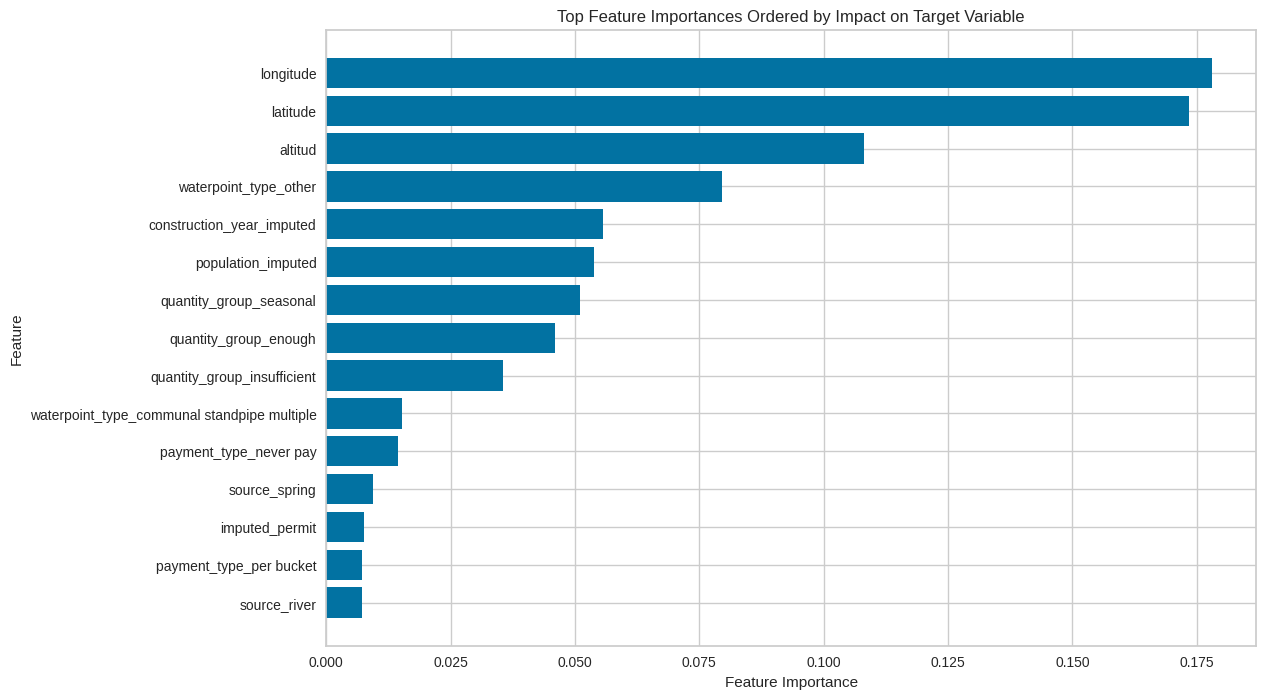

In [ ]:
plot_feature_importances(model,15)

1. Las variables relacionadas con la ubicación geográfica, como longitude, latitude y altitude, tienen un impacto significativamente mayor en la funcionalidad de las bombas de agua. Esto sugiere que factores geográficos como la distancia a fuentes de mantenimiento, accesibilidad, o condiciones ambientales específicas de ciertas regiones son determinantes en el desempeño de estas infraestructuras.

2. La característica waterpoint_type_other destaca como una de las más influyentes después de los factores geográficos. Esto refuerza la idea de que algunos tipos de infraestructura de bombeo, posiblemente menos estándares o adaptados a las condiciones locales, tienen una relación más directa con fallos en funcionalidad.

3. Las variables construction_year_imputed y population_imputed son también relevantes. Esto indica que el envejecimiento de las instalaciones y la presión demográfica son factores importantes para entender por qué algunas bombas funcionan peor.

In [ ]:
def plot_tree_complexity_vs_accuracy(df, target_column, max_depth_range=range(1, 21)):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    categorical_features = X.select_dtypes(include=['object', 'category']).columns
    X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    train_accuracies = []
    test_accuracies = []

    for max_depth in max_depth_range:
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)

        train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
        test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

    plt.figure(figsize=(12, 8))
    plt.plot(max_depth_range, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(max_depth_range, test_accuracies, label='Testing Accuracy', marker='o')
    plt.xlabel("Max Depth of Decision Tree")
    plt.ylabel("Accuracy")
    plt.title("Decision Tree Complexity vs. Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()



### Intento de Mejora

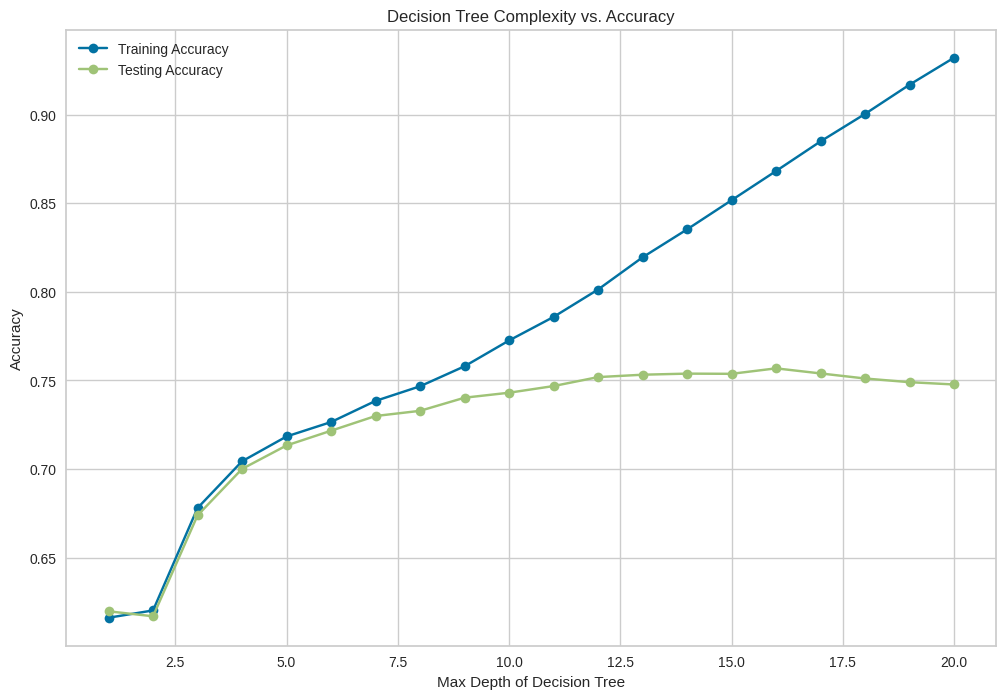

In [ ]:
plot_tree_complexity_vs_accuracy(pumps_df, 'status_group')

In [ ]:
param_grid_dt = {
    "max_depth": [3, 4, 5, 6, 7, 8, 10, 12],
    "min_samples_leaf": [1, 5, 10, 15, 20],
    "criterion": ["gini", "entropy", "log_loss"]
}


In [ ]:
grid_dt = GridSearchCV(estimator=model, param_grid=param_grid_dt, scoring=["precision", "recall", "f1", "roc_auc"], refit="f1", cv=5, return_train_score=True)

In [ ]:
X = pumps_df.drop(columns=['status_group'])
y = pumps_df['status_group']
grid_dt.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 12],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             refit='f1', return_train_score=True,
             scoring=['precision', 'recall', 'f1', 'roc_auc'])

In [ ]:
grid_dt.best_params_


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

Podemos ver los mejores criterios del arbol de desición para mejorar parametros mediante una busqueda de grilla.

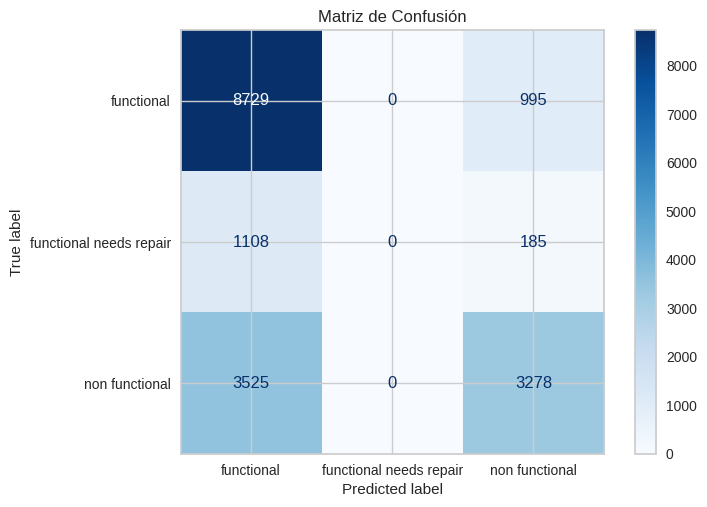

In [ ]:
best_model = grid_dt.best_estimator_
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted para clases desbalanceadas
recall = recall_score(y_test, y_pred, average='weighted')        # Weighted para clases desbalanceadas
f1 = f1_score(y_test, y_pred, average='weighted')                # Weighted para clases desbalanceadas

# Imprime las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6737934904601571
Precision: 0.637188422216396
Recall: 0.6737934904601571
F1 Score: 0.6349077858361946


El modelo empeora

## Vectores

In [ ]:
pumps_df[pumps_df['id']==49651]['longitude']

,longitude
59374,0.0


##XGBOOST


In [ ]:
X = pumps_df.drop(columns=["status_group"])
y = pumps_df["status_group"]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.3, random_state=42)


# Definir el modelo base
model = xgb.XGBClassifier(random_state=42, enable_categorical=True)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    "n_estimators": [50, 100, 150],  # Número de árboles
    "max_depth": [3, 5, 7],          # Profundidad máxima de los árboles
    "learning_rate": [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    "subsample": [0.6, 0.8, 1.0],       # Porcentaje de muestras usadas por árbol
    "colsample_bytree": [0.6, 0.8, 1.0] # Porcentaje de características usadas por árbol
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",  # Métrica de evaluación
    cv=5,                # Número de particiones en validación cruzada
    verbose=1,           # Mostrar el progreso
    n_jobs=-1            # Usar todos los núcleos disponibles
)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros encontrados:", best_params)

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del mejor modelo: {accuracy:.2f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores parámetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Exactitud del mejor modelo: 0.79


In [ ]:
# Evaluate the loaded model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the loaded model: {accuracy:.2f}")

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Decode predictions (optional)
y_pred_decoded = label_encoder.inverse_transform(y_pred)
print("Decoded predictions:", y_pred_decoded)

Accuracy of the loaded model: 0.79

Classification Report:
                         precision    recall  f1-score   support

             functional       0.78      0.90      0.84      9724
functional needs repair       0.59      0.26      0.36      1293
         non functional       0.83      0.75      0.79      6803

               accuracy                           0.79     17820
              macro avg       0.73      0.63      0.66     17820
           weighted avg       0.79      0.79      0.78     17820

Decoded predictions: ['non functional' 'functional' 'functional' ... 'functional' 'functional'
 'functional']


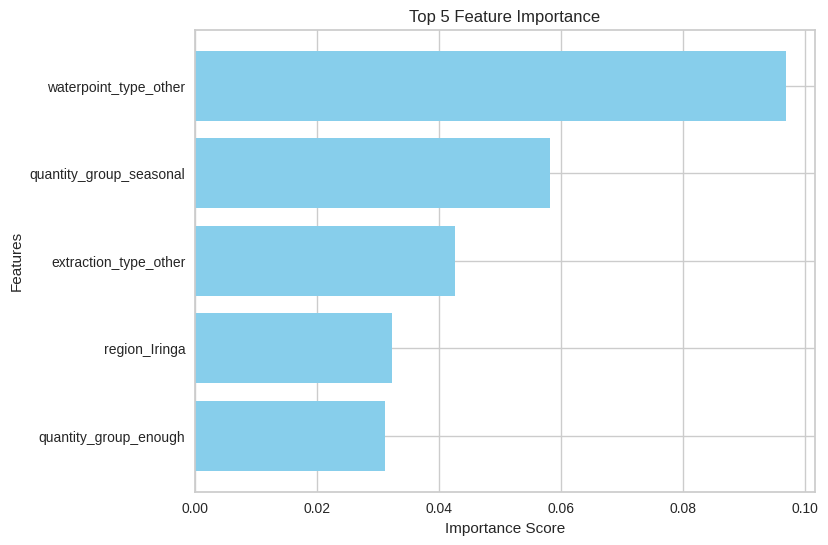

In [ ]:
feature_importances = best_model.feature_importances_
features = X_train.columns

# Combine features and their importances
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Select top 5 features
top_features = importance_df.head(5)

# Plot top 5 feature importances
plt.figure(figsize=(8, 6))
plt.barh(top_features["Feature"], top_features["Importance"], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 5 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [ ]:
joblib_filename = "/content/drive/MyDrive/Proyecto DS 2024/best_xgb_model.joblib"
joblib.dump(best_model, joblib_filename)
print(f"Best model saved to {joblib_filename}")

Best model saved to /content/drive/MyDrive/Proyecto DS 2024/best_xgb_model.joblib


# End